# REGRESSION WITH ANN

### Dataset description

* CRIM: per capita crime rate by town
* ZN: proportion of residential land zoned for lots over 25,000 sq.ft.
* INDUS: proportion of non-retail business acres per town.
* CHAS: Charles River dummy variable (1 if tract bounds river; 0 otherwise)
* NOX: nitric oxides concentration (parts per 10 million)
* RM: average number of rooms per dwelling
* AGE: proportion of owner-occupied units built prior to 1940
* DIS: weighted distances to five Boston employment centres
* RAD: index of accessibility to radial highways
* TAX: full-value property-tax rate per 10,000 dollars
* PTRATIO: pupil-teacher ratio by town
* B: 1000(Bk — 0.63)² where Bk is the proportion of blacks by town
* LSTAT: % lower status of the population
* MEDV: Median value of owner-occupied homes in 1000 dollars




**The objective of this notebook is to use the 13th first features to predict the MEDV (housing price).**

## Imports

In [11]:
import pandas as pd
import numpy as np
import tensorflow as tf

tf.__version__

'2.15.0'

## Importing and visualizing dataset

In [3]:
from tensorflow.keras import datasets

In [4]:
boston_housing = datasets.boston_housing

In [5]:
(X_train, y_train), (X_test, y_test) = boston_housing.load_data()

57026/57026 [==============================] - 0s 0us/step


In [6]:
X_train.shape

(404, 13)

In [7]:
X_test.shape

(102, 13)

In [8]:
boston_housing.load_data()

((array([[1.23247e+00, 0.00000e+00, 8.14000e+00, ..., 2.10000e+01,
          3.96900e+02, 1.87200e+01],
         [2.17700e-02, 8.25000e+01, 2.03000e+00, ..., 1.47000e+01,
          3.95380e+02, 3.11000e+00],
         [4.89822e+00, 0.00000e+00, 1.81000e+01, ..., 2.02000e+01,
          3.75520e+02, 3.26000e+00],
         ...,
         [3.46600e-02, 3.50000e+01, 6.06000e+00, ..., 1.69000e+01,
          3.62250e+02, 7.83000e+00],
         [2.14918e+00, 0.00000e+00, 1.95800e+01, ..., 1.47000e+01,
          2.61950e+02, 1.57900e+01],
         [1.43900e-02, 6.00000e+01, 2.93000e+00, ..., 1.56000e+01,
          3.76700e+02, 4.38000e+00]]),
  array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4, 12.1,
         17.9, 23.1, 19.9, 15.7,  8.8, 50. , 22.5, 24.1, 27.5, 10.9, 30.8,
         32.9, 24. , 18.5, 13.3, 22.9, 34.7, 16.6, 17.5, 22.3, 16.1, 14.9,
         23.1, 34.9, 25. , 13.9, 13.1, 20.4, 20. , 15.2, 24.7, 22.2, 16.7,
         12.7, 15.6, 18.4, 21. , 30.1, 15.1, 18.7,  9.6, 31.

In [9]:
y_train.shape

(404,)

In [12]:
features = ["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT", "MEDV"] # we keep the first 13 features

df_train = pd.DataFrame(np.column_stack([X_train, y_train]), columns=features)
df_train.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,1.23247,0.0,8.14,0.0,0.538,6.142,91.7,3.9769,4.0,307.0,21.0,396.90,18.72,15.2
1,0.02177,82.5,2.03,0.0,0.415,7.610,15.7,6.2700,2.0,348.0,14.7,395.38,3.11,42.3
2,4.89822,0.0,18.10,0.0,0.631,4.970,100.0,1.3325,24.0,666.0,20.2,375.52,3.26,50.0
3,0.03961,0.0,5.19,0.0,0.515,6.037,34.5,5.9853,5.0,224.0,20.2,396.90,8.01,21.1
4,3.69311,0.0,18.10,0.0,0.713,6.376,88.4,2.5671,24.0,666.0,20.2,391.43,14.65,17.7
5,0.28392,0.0,7.38,0.0,0.493,5.708,74.3,4.7211,5.0,287.0,19.6,391.13,11.74,18.5
6,9.18702,0.0,18.10,0.0,0.700,5.536,100.0,1.5804,24.0,666.0,20.2,396.90,23.60,11.3
7,4.09740,0.0,19.58,0.0,0.871,5.468,100.0,1.4118,5.0,403.0,14.7,396.90,26.42,15.6
8,2.15505,0.0,19.58,0.0,0.871,5.628,100.0,1.5166,5.0,403.0,14.7,169.27,16.65,15.6
9,1.62864,0.0,21.89,0.0,0.624,5.019,100.0,1.4394,4.0,437.0,21.2,396.90,34.41,14.4


### Dataset division

In [13]:
from sklearn.model_selection import train_test_split

X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5)

In [14]:
X_test.shape

(51, 13)

In [15]:
X_val.shape

(51, 13)

## ANN arquitecture

In [16]:
from tensorflow.keras import models
from tensorflow.keras import layers

We define an Artificial Neural Network made up of 3 layers:

- The first layer will be made up of 30 neurons
- The second layer will be made up of 10 neurons
- The last layer will be made up of 1 neuron



In [17]:
network = models.Sequential()

network.add(layers.Dense(30, activation='relu', input_shape=X_train.shape[1:]))
network.add(layers.Dense(10, activation='relu'))
network.add(layers.Dense(1)) # The output layer doesn't have an activation function because it is a REGRESSION

In [18]:
network.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                420       
                                                                 
 dense_1 (Dense)             (None, 10)                310       
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 741 (2.89 KB)
Trainable params: 741 (2.89 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [19]:
network.layers

In [20]:
hidden1 = network.layers[1]

In [21]:
weights, biases = hidden1.get_weights()

In [22]:
weights

array([[ 0.10541573,  0.19051415, -0.02718547,  0.22224861,  0.2913193 ,
        -0.00944233, -0.18885788, -0.03343442,  0.08669978, -0.23394504],
       [ 0.07387048, -0.15463248, -0.08662036,  0.30596602, -0.02938342,
         0.04186296, -0.33036095, -0.264867  ,  0.04617345,  0.13474625],
       [-0.1621306 , -0.17187552, -0.1404358 , -0.12894142,  0.28758973,
        -0.06844184,  0.0266836 , -0.14005804,  0.3591324 ,  0.26978463],
       [ 0.22814226, -0.3787591 ,  0.04821339, -0.04056531, -0.29218286,
         0.35928828,  0.28132164,  0.3455307 ,  0.3044089 , -0.30414033],
       [-0.1358276 ,  0.16801453, -0.2488869 , -0.29062158, -0.269808  ,
        -0.29586202,  0.36955643,  0.26582778,  0.17391658,  0.20171076],
       [-0.31680703,  0.09001273,  0.28629625, -0.30221504,  0.03316915,
         0.05381811, -0.36911833, -0.14105678,  0.15273768, -0.2678599 ],
       [ 0.28237116,  0.04159158, -0.38028842,  0.24225134, -0.14237234,
        -0.22045486,  0.19599497,  0.0450168 

In [23]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

## ANN configuration

In [24]:
network.compile(loss='mean_squared_error',
                optimizer='sgd')  # the error function must be the MSE because it is a REGRESSION

## Dataset preparation

It's very important to ensure the data is in the same scale.


In [25]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

X_train_prep = scaler.fit_transform(X_train) # .fit_transform is just for the train data!!
X_val_prep = scaler.transform(X_val)
X_test_prep = scaler.transform(X_test)

# For the validation and test data we only use de .transform. We want to ensure that if we want to predict new examples, they will be scaled the same way as they were done in the train set, that way we don't fit it agai we just transform them.


## ANN training

In [26]:
history = network.fit(X_train_prep,
                      y_train,
                      epochs=30,
                      validation_data=(X_val_prep, y_val))

Epoch 1/30
13/13 [==============================] - 1s 19ms/step - loss: 356.5236 - val_loss: 100.8397
Epoch 2/30
13/13 [==============================] - 0s 5ms/step - loss: 93.3385 - val_loss: 39.6812
Epoch 3/30
13/13 [==============================] - 0s 5ms/step - loss: 29.8843 - val_loss: 42.9734
Epoch 4/30
13/13 [==============================] - 0s 4ms/step - loss: 60.5911 - val_loss: 42.8077
Epoch 5/30
13/13 [==============================] - 0s 4ms/step - loss: 38.2635 - val_loss: 40.2793
Epoch 6/30
13/13 [==============================] - 0s 4ms/step - loss: 25.8681 - val_loss: 46.5943
Epoch 7/30
13/13 [==============================] - 0s 6ms/step - loss: 26.3574 - val_loss: 60.2844
Epoch 8/30
13/13 [==============================] - 0s 6ms/step - loss: 24.2623 - val_loss: 222.8783
Epoch 9/30
13/13 [==============================] - 0s 6ms/step - loss: 79.1015 - val_loss: 43.6048
Epoch 10/30
13/13 [==============================] - 0s 6ms/step - loss: 22.2397 - val_loss: 46.

The metrics of the lest epoch are:

Epoch 30/30
13/13 [==============================] - 0s 6ms/step - loss: **14.9178** - val_loss: **25.8662**

The error of the train set is lower than the validation error, this is an indicative of overfitting. This is normal given that we have few examples in our data.

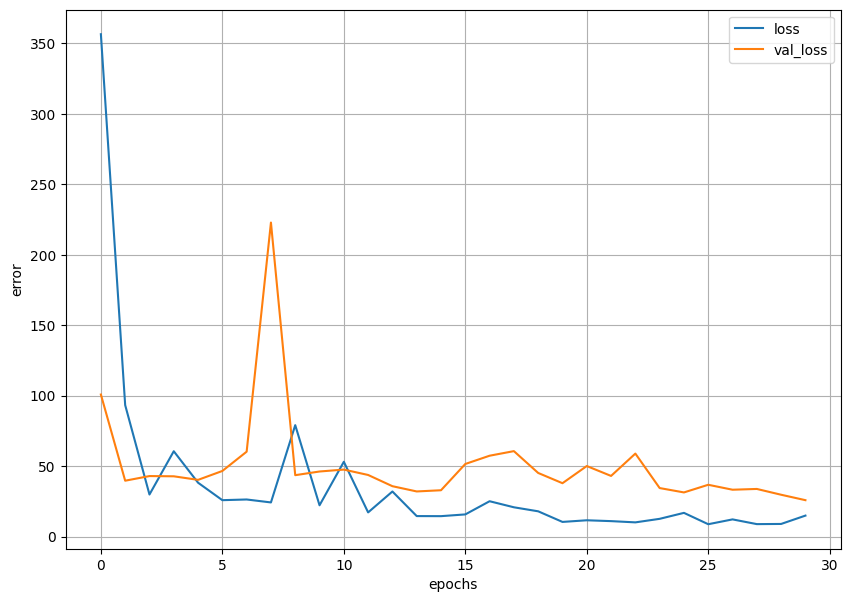

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(10, 7))
plt.grid(True)
plt.xlabel("epochs")
plt.ylabel("error")
plt.show()

## Validation with the test set

In [28]:
test_loss = network.evaluate(X_test_prep, y_test)

2/2 [==============================] - 0s 6ms/step - loss: 15.3635


In [29]:
print('test_mse:', test_loss)

test_mse: 15.363482475280762


## New examples prediction

In [30]:
X_new = X_test[23]

In [31]:
features = ["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT", "MEDV"]

df_new = pd.DataFrame([X_new], columns=features[:-1])
df_new.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.11069,0.0,13.89,1.0,0.55,5.951,93.8,2.8893,5.0,276.0,16.4,396.9,17.92


In [32]:
X_new_prep = scaler.transform(df_new) #pre process the example we want to predict

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RobustScaler was fitted without feature names
  warnings.warn(


In [33]:
y_predict = network.predict(X_new_prep)

1/1 [==============================] - 0s 86ms/step


In [34]:
y_predict

array([[19.672056]], dtype=float32)

In [35]:
y_predict.round(2)

array([[19.67]], dtype=float32)

In [37]:
# We compare the prediction with the original value
print("Prediction:", y_predict.round(2))
print("Original value:", y_test[23])

Prediction: [[19.67]]
Original value: 21.5
